In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser


In [266]:

# Lendo o arquivo de configuração
def read_config(filename, section):
    config = ConfigParser()
    config.read(filename)
    if section in config:
        return config[section]
    else:
        raise ValueError(f"Section '{section}' not found in the configuration file.")

def filter_dataframe(df, config, solution):
    # Construindo a expressão de filtro com base na configuração
    filter_expressions = []
    for key, value in config.items():
        if key in df.columns:
            column_type = df[key].dtype
            if column_type == 'bool':
                typed_value = str(value.lower() in ['true', 'yes', '1'])
            elif column_type in ['int64', 'float']:
                typed_value = value
            else:
                typed_value = f"'{value}'"  # Adiciona aspas para garantir que seja tratado como string

            filter_expressions.append(f"(client_data['{key}'] == {typed_value})")

    # Juntando as expressões de filtro com operador lógico AND
    filter_expressions.append(f"(client_data['solution'] == '{solution}'.upper())")
    filter_expression = " & ".join(filter_expressions)
    print(filter_expression)
    filtered_df = df.loc[eval(filter_expression)]
    return filtered_df


In [267]:
#round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,l_fit_acc,l_fit_loss,dynamic_engagement,old_dynamic_engagement,is_selected,desire,size,cost,willing,r_intention,miss,epoch,dirichlet_alpha,no_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
client_data = pd.read_csv('logs/c-data.csv')

In [268]:
config = read_config('config-debug.ini', 'FedAVG debug')
filtered_data = filter_dataframe(client_data, config,'avg')
filtered_data

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'avg'.upper())


,round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,...,miss,epoch,dirichlet_alpha,no_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
9000,1,13,AVG,random,0.237237,106.586044,0.262763,84.844421,0.976662,1.320733,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9001,1,0,AVG,random,0.257871,18.333275,0.451274,28.907377,0.898124,2.341175,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9002,1,11,AVG,random,0.654655,12.998011,0.665165,7.989770,0.912187,0.725200,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9003,1,3,AVG,random,0.260870,18.091858,0.325337,52.410198,0.932723,2.302245,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9004,1,8,AVG,random,0.325337,48.820683,0.286357,43.365002,0.978597,0.806644,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,50,0,AVG,random,0.671664,3.542129,0.523238,32.415756,0.977897,0.088175,...,24,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9746,50,14,AVG,random,0.641141,3.287254,0.381381,27.081333,0.996950,0.011087,...,23,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9747,50,1,AVG,random,0.677661,3.534677,0.478261,42.021481,0.947397,0.180467,...,26,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9748,50,7,AVG,random,0.683658,2.542900,0.563718,48.122639,0.997873,0.008931,...,21,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0


In [278]:
tests = [
    # 'FedCIA debug set1_var1',
    # 'FedCIA debug set1_var2',
    # 'FedCIA debug set1_var3',
    # 'FedCIA debug set1_var4',
    # 'FedCIA debug set1_var5',
    'FedCIA debug set1_var6', # Promissor
    # 'FedCIA debug set1_var7',
    # 'FedCIA debug set1_var8',
    # 'FedCIA debug set1_var9',
    # 'FedCIA debug set1_var10',
    # 'FedCIA debug set1_var11',
    # 'FedCIA debug set1_var12',
    'FedAVG debug',
    'FedDEEV debug',
    'FedPOC debug',
    # 'FedDEEV variant1',
    # 'FedDEEV variant2',
    # 'FedDEEV variant3',
]

In [270]:
config = read_config('config-debug.ini', 'FedDEEV debug')
filtered_data = filter_dataframe(client_data, config,'deev')
filtered_data.head()

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'deev'.upper())


,round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,...,miss,epoch,dirichlet_alpha,no_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
9750,1,10,DEEV,random,0.369369,24.196138,0.360360,22.331926,0.963793,0.525621,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9751,1,4,DEEV,random,0.313343,35.157860,0.271364,79.897919,0.971016,0.873209,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9752,1,2,DEEV,random,0.289355,37.745918,0.335832,67.186508,0.811966,14.193020,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9753,1,7,DEEV,random,0.479760,22.104198,0.533733,35.917404,0.972346,0.645400,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0
9754,1,9,DEEV,random,0.401799,46.969475,0.416792,47.181374,0.890427,3.518636,...,1,4,0.1,True,mnist,0.0,0.0,0.0,0.005,1.0


In [271]:
config = read_config('config-debug.ini', 'FedDEEV variant1')
filtered_data = filter_dataframe(client_data, config,'deev')
filtered_data.head()

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.01) & (client_data['solution'] == 'deev'.upper())


,round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,...,miss,epoch,dirichlet_alpha,no_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
11250,1,8,DEEV,random,0.340330,28.999952,0.283358,78.568718,0.982460,0.381600,...,1,6,0.1,True,mnist,0.0,0.0,0.0,0.01,1.0
11251,1,13,DEEV,random,0.258258,126.733246,0.306306,112.588120,0.984939,0.850410,...,1,6,0.1,True,mnist,0.0,0.0,0.0,0.01,1.0
11252,1,14,DEEV,random,0.303303,23.230185,0.315315,18.184309,0.969697,0.590873,...,1,6,0.1,True,mnist,0.0,0.0,0.0,0.01,1.0
11253,1,0,DEEV,random,0.220390,24.894617,0.353823,4.182403,0.885835,1.146613,...,1,6,0.1,True,mnist,0.0,0.0,0.0,0.01,1.0
11254,1,4,DEEV,random,0.235382,24.852684,0.292354,79.322784,0.977353,0.419898,...,1,6,0.1,True,mnist,0.0,0.0,0.0,0.01,1.0


(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.01) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == False) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.02) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.003) & (client_data['solution'] == 'deev'.upper())


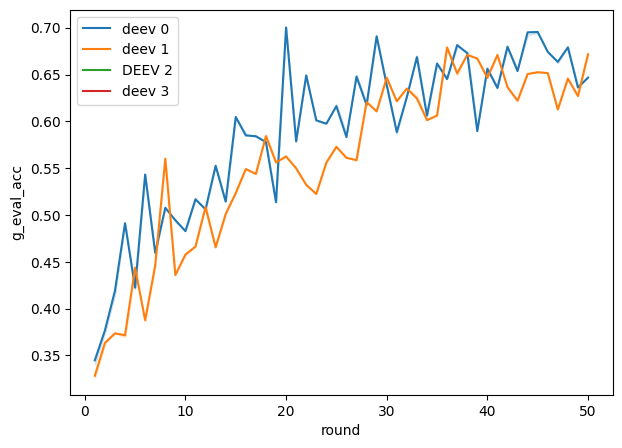

In [272]:
fig, ax = plt.subplots(figsize=(7,5))
# for i, t in enumerate(tests):
    # print(t)
config = read_config('config-debug.ini', 'FedDEEV debug')
filtered_data = filter_dataframe(client_data, config,'deev')
# print(filtered_data.shape)
# print(filtered_data.head)
sns.lineplot(ax=ax, x='round', y='g_eval_acc', data=filtered_data, label=f'deev 0', errorbar=('ci', False))

config = read_config('config-debug.ini', 'FedDEEV variant1')
filtered_data = filter_dataframe(client_data, config,'deev')
sns.lineplot(ax=ax, x='round', y='g_eval_acc', data=filtered_data, label=f'deev 1', errorbar=('ci', False))

config = read_config('config-debug.ini', 'FedDEEV variant2')
filtered_data = filter_dataframe(client_data, config, 'deev')
sns.lineplot(ax=ax, x='round', y='g_eval_acc', data=filtered_data, label=f'DEEV 2', errorbar=('ci', False))

config = read_config('config-debug.ini', 'FedDEEV variant3')
filtered_data = filter_dataframe(client_data, config, 'deev')
sns.lineplot(ax=ax, x='round', y='g_eval_acc', data=filtered_data, label=f'deev 3', errorbar=('ci', False))
ax.legend()

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.03) & (client_data['exploration'] == 0.25) & (client_data['least_select_factor'] == 0.3) & (client_data['threshold'] == 1.0) & (client_data['solution'] == 'cia'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'avg'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'poc'.upper())


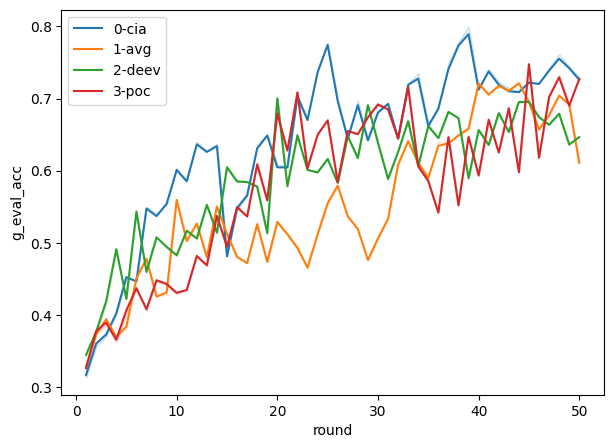

In [282]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    sol = ''
    if 'CIA' in t:
        sol = 'cia'
    elif 'POC' in t:
        sol = 'poc'
    elif 'AVG' in t:
        sol = 'avg'
    elif 'DEEV' in t:
        sol = 'deev'
    filtered_data = filter_dataframe(client_data, config, sol)
    sns.lineplot(ax=ax, x='round', y='g_eval_acc', data=filtered_data, label=f'{i}-{sol}', errorbar=('ci', False))
ax.legend()

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.03) & (client_data['exploration'] == 0.25) & (client_data['least_select_factor'] == 0.3) & (client_data['threshold'] == 1.0) & (client_data['solution'] == 'cia'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'avg'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'poc'.upper())


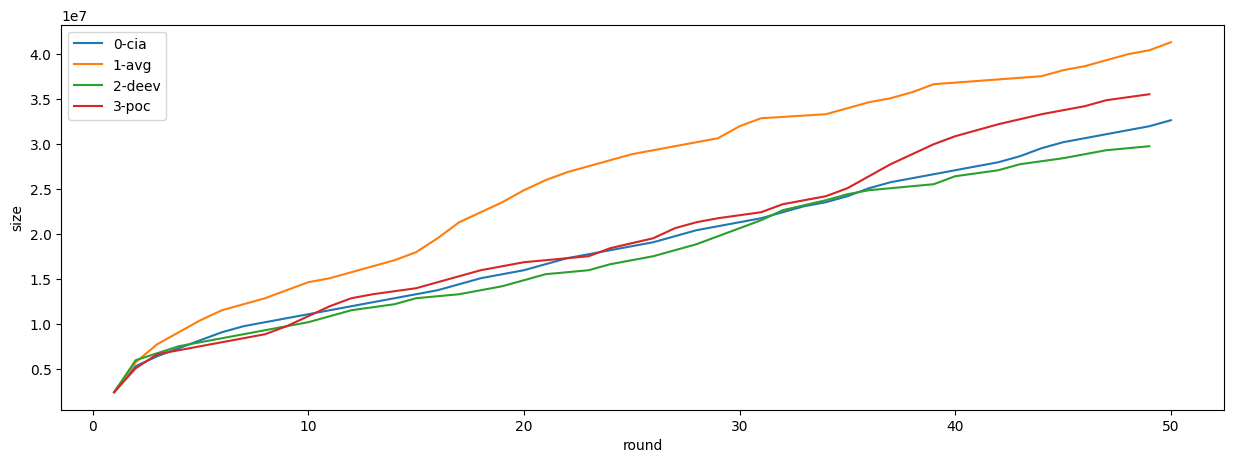

In [283]:
fig, ax = plt.subplots(figsize=(15,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    sol = ''
    if 'CIA' in t:
        sol = 'cia'
    elif 'POC' in t:
        sol = 'poc'
    elif 'AVG' in t:
        sol = 'avg'
    elif 'DEEV' in t:
        sol = 'deev'
    filtered_data = filter_dataframe(client_data, config, sol)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
    # print(filtered_data.shape[0])
    if filtered_data.shape[0] > 0:
        sns.lineplot(ax=ax, x='round', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{i}-{sol}', errorbar=('ci', False))
ax.legend()
# ax.set_yscale('log')

(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.005) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.01) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == False) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.02) & (client_data['solution'] == 'deev'.upper())
(client_data['dataset'] == 'mnist') & (client_data['no_iid'] == True) & (client_data['dirichlet_alpha'] == 0.1) & (client_data['decay'] == 0.003) & (client_data['solution'] == 'deev'.upper())


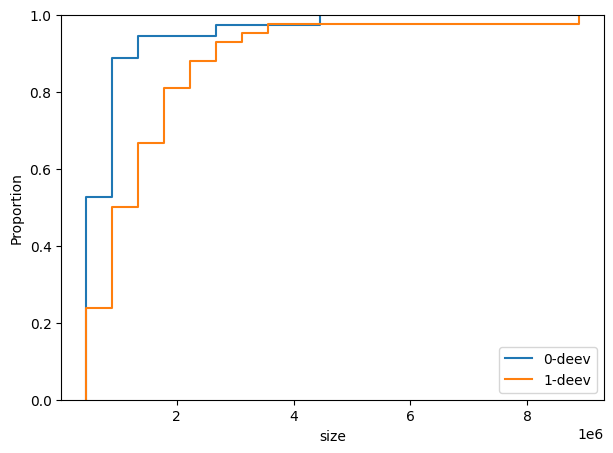

In [275]:
fig, ax = plt.subplots(figsize=(7,5))
for i, t in enumerate(tests):
    config = read_config('config-debug.ini', t)
    sol = ''
    if 'CIA' in t:
        sol = 'cia'
    elif 'POC' in t:
        sol = 'poc'
    elif 'AVG' in t:
        sol = 'avg'
    elif 'DEEV' in t:
        sol = 'deev'
    filtered_data = filter_dataframe(client_data, config, sol)
    filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True) & (filtered_data['old_dynamic_engagement'] == False)]
    filtered_data = filtered_data.groupby('round').count() * 444584
    # print(filtered_data)
    # if filtered_data.shape[0] > 0:
    sns.ecdfplot(ax=ax, x='size', data=filtered_data, label=f'{i}-{sol}')
ax.legend()